In [34]:
# Import libraries
import pandas as pd
import numpy as np

In [17]:
# Load dataframe
df = pd.read_csv("./../data/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [18]:
# Get information about columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [19]:
# Get statistics of each feature
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [20]:
# Number of null values in each column
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [21]:
# Fill null values with median
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

<Axes: >

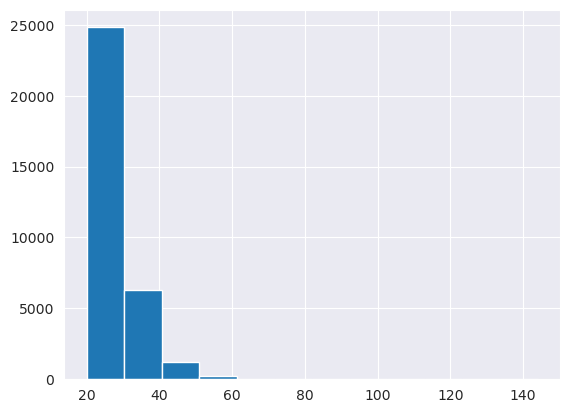

In [22]:
# Remove outliers of age
df['person_age'].hist(bins=12)

In [23]:
# Get quantile and inter quartile range
quantile_1 = np.quantile(df.person_age, 0.25)
quantile_3 = np.quantile(df.person_age, 0.75)
quantile_1, quantile_3

(23.0, 30.0)

In [24]:
iqr = quantile_3 - quantile_1
iqr

7.0

In [25]:
df = df[(quantile_1 - 1.5 * iqr <= df.person_age) & (df.person_age <= quantile_3 + 1.5 * iqr)]

<Axes: >

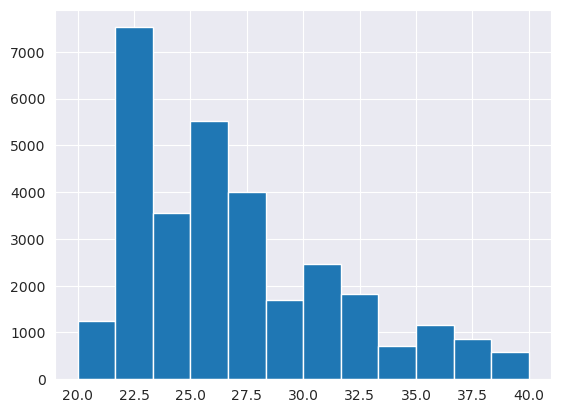

In [26]:
df.person_age.hist(bins=12)

<Axes: >

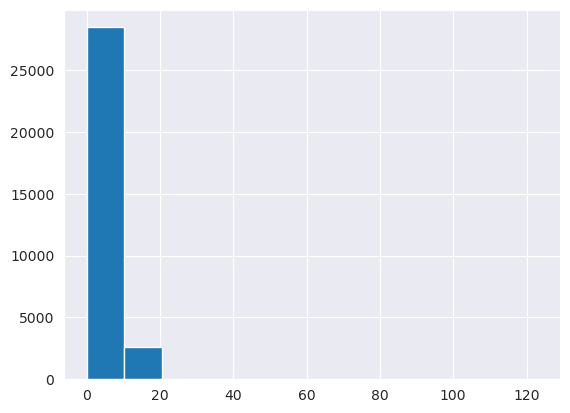

In [27]:
# Remove outliers of person employ length
df['person_emp_length'].hist(bins=12)

In [28]:
# Get quantile and inter quartile range of person_emp_length
quantile_pel_1 = np.quantile(df.person_emp_length, 0.25)
quantile_pel_3 = np.quantile(df.person_emp_length, 0.75)
quantile_pel_1, quantile_pel_3

(2.0, 7.0)

In [29]:
iqr_pel = quantile_pel_3 - quantile_pel_1
iqr_pel

5.0

In [30]:
df = df[(quantile_pel_1 - 1.5 * iqr_pel <= df.person_emp_length) & (df.person_emp_length <= quantile_pel_3 + 1.5 * iqr_pel)]

<Axes: >

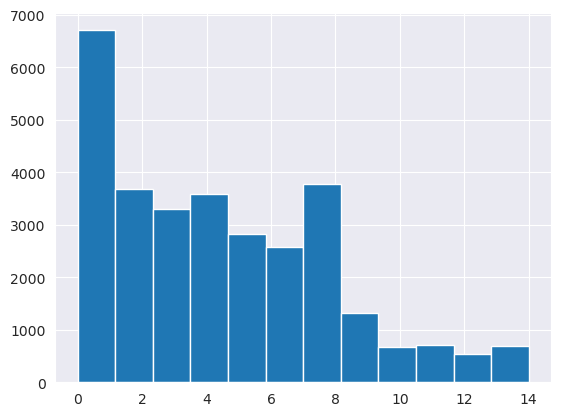

In [31]:
df.person_emp_length.hist(bins=12)

In [32]:
# Export processed dataframe to csv
df.to_csv('./../data/processed_credit_risk_data.csv', index=False)